In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


In [6]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f35402005a85bbf80e889adf6f41c46


In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Create a set of random latitude and longitude combinations.
lats=np.random.uniform(low=-90.000, high=90.000,size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs


In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

57.352360423450705 -109.31941151866869
84.9584939739037 127.91538850141126
31.407967123053666 56.35413348049855
-37.21683867679284 -108.35679368710643
-48.01323378584224 -143.9135799051875
-33.25455283059439 33.180575549113115
-3.2061340548455206 172.21972198983872
-41.7519518048404 -179.48653324271558
-21.741324260887524 21.536113836685672
67.35470179289103 -91.31766797854755
-81.43922135388897 -35.61171513959232
-3.4636089612944403 -13.878399881000064
-52.67911535692388 -111.94969216387707
-50.09475141361485 -176.06439116499322
-58.357413815667584 -51.97054888777416
8.899386078695642 -97.31295869839101
-73.29755319287045 -39.75335141689271
3.964168168283905 27.39933224841414
-15.075155059288107 29.636236906301207
85.0689737321334 -162.54439120009263
-47.71461986721609 -160.60141328280338
47.53571769163375 137.82584085770037
-69.85771692845887 15.04534769311877
-39.4202156250137 151.4133478245301
-70.86912089892502 -154.11787980528888
72.76683429991431 154.92302091871892
-0.3098191619

In [13]:
# Create a list for holding the cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates: 
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
# If the city is unique, then we will add it to the cities list.
    if city not in cities:
            cities.append(city)
 # Print the city count to confirm sufficient count.
len(cities)

605

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | grand centre
City not found. Skipping...
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | ravar
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | margate
Processing Record 7 of Set 1 | utiroa
City not found. Skipping...
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | ghanzi
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | pochutla
Processing Record 14 of Set 1 | yambio
Processing Record 15 of Set 1 | luangwa
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | svetlaya
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | lakes entrance
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | viligili
City not found. Skipping...
Processing Record 23 of Set 

Processing Record 37 of Set 4 | quzhou
Processing Record 38 of Set 4 | sinnamary
Processing Record 39 of Set 4 | safranbolu
Processing Record 40 of Set 4 | drayton valley
Processing Record 41 of Set 4 | bathsheba
Processing Record 42 of Set 4 | qaanaaq
Processing Record 43 of Set 4 | ihosy
Processing Record 44 of Set 4 | riedlingen
Processing Record 45 of Set 4 | zhukovka
Processing Record 46 of Set 4 | saint-augustin
Processing Record 47 of Set 4 | isla vista
Processing Record 48 of Set 4 | sao felix do xingu
Processing Record 49 of Set 4 | ancud
Processing Record 50 of Set 4 | severo-kurilsk
Processing Record 1 of Set 5 | listvyanka
Processing Record 2 of Set 5 | sedelnikovo
City not found. Skipping...
Processing Record 3 of Set 5 | sao joao da barra
Processing Record 4 of Set 5 | havelock
Processing Record 5 of Set 5 | xanlar
Processing Record 6 of Set 5 | tuggurt
City not found. Skipping...
Processing Record 7 of Set 5 | sabaudia
Processing Record 8 of Set 5 | west plains
Processin

Processing Record 24 of Set 8 | kununurra
Processing Record 25 of Set 8 | mitchell
Processing Record 26 of Set 8 | mountain home
Processing Record 27 of Set 8 | teknaf
Processing Record 28 of Set 8 | toora-khem
Processing Record 29 of Set 8 | pasaje
Processing Record 30 of Set 8 | gonbad-e qabus
Processing Record 31 of Set 8 | raga
Processing Record 32 of Set 8 | beyneu
Processing Record 33 of Set 8 | moindou
Processing Record 34 of Set 8 | parabel
Processing Record 35 of Set 8 | palmer
Processing Record 36 of Set 8 | juli
Processing Record 37 of Set 8 | bondo
Processing Record 38 of Set 8 | armenia
Processing Record 39 of Set 8 | galesburg
Processing Record 40 of Set 8 | timmins
Processing Record 41 of Set 8 | zhigansk
Processing Record 42 of Set 8 | conceicao do araguaia
Processing Record 43 of Set 8 | ambo
Processing Record 44 of Set 8 | peniche
Processing Record 45 of Set 8 | san patricio
Processing Record 46 of Set 8 | magistralnyy
Processing Record 47 of Set 8 | jieshi
Processing

Processing Record 13 of Set 12 | port-gentil
Processing Record 14 of Set 12 | asau
Processing Record 15 of Set 12 | bilibino
Processing Record 16 of Set 12 | puerto baquerizo moreno
Processing Record 17 of Set 12 | los llanos de aridane
Processing Record 18 of Set 12 | kloulklubed
Processing Record 19 of Set 12 | lardos
Processing Record 20 of Set 12 | kuusamo
Processing Record 21 of Set 12 | tevaitoa
Processing Record 22 of Set 12 | zhangzhou
Processing Record 23 of Set 12 | sovetskaya gavan
Processing Record 24 of Set 12 | sayaxche
Processing Record 25 of Set 12 | comana
Processing Record 26 of Set 12 | leningradskiy
Processing Record 27 of Set 12 | les cayes
Processing Record 28 of Set 12 | venice
Processing Record 29 of Set 12 | ibra
Processing Record 30 of Set 12 | mhlambanyatsi
Processing Record 31 of Set 12 | naryan-mar
Processing Record 32 of Set 12 | progreso
Processing Record 33 of Set 12 | orlik
Processing Record 34 of Set 12 | singkawang
Processing Record 35 of Set 12 | tra

In [52]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df= pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,-12.10,98,93,6.51,RU,2023-04-06 16:26:26
1,Ravar,31.2656,56.8055,72.23,12,28,4.50,IR,2023-04-06 16:26:27
2,Rikitea,-23.1203,-134.9692,76.87,70,16,10.33,PF,2023-04-06 16:26:27
3,Mataura,-46.1927,168.8643,39.04,86,81,2.86,NZ,2023-04-06 16:26:27
4,Margate,51.3813,1.3862,55.69,68,100,5.01,GB,2023-04-06 16:26:27
5,Vaini,-21.2000,-175.2000,78.96,94,40,4.61,TO,2023-04-06 16:26:28
6,Ghanzi,-21.5667,21.7833,84.97,25,6,5.28,BW,2023-04-06 16:26:28
7,Thompson,55.7435,-97.8558,23.16,42,20,3.44,CA,2023-04-06 16:21:51
8,Ushuaia,-54.8000,-68.3000,51.46,46,40,9.22,AR,2023-04-06 16:26:29
9,Georgetown,5.4112,100.3354,85.93,73,20,2.30,MY,2023-04-06 16:25:25


In [48]:
#new_column_order=["City","Country","Date"]
#city_data_df=city_data_df[new_column_order]
#city_data_df.head(10)

,City,Country,Date
0,Tiksi,RU,2023-04-06 16:26:26
1,Ravar,IR,2023-04-06 16:26:27
2,Rikitea,PF,2023-04-06 16:26:27
3,Mataura,NZ,2023-04-06 16:26:27
4,Margate,GB,2023-04-06 16:26:27
5,Vaini,TO,2023-04-06 16:26:28
6,Ghanzi,BW,2023-04-06 16:26:28
7,Thompson,CA,2023-04-06 16:21:51
8,Ushuaia,AR,2023-04-06 16:26:29
9,Georgetown,MY,2023-04-06 16:25:25


In [53]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [54]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

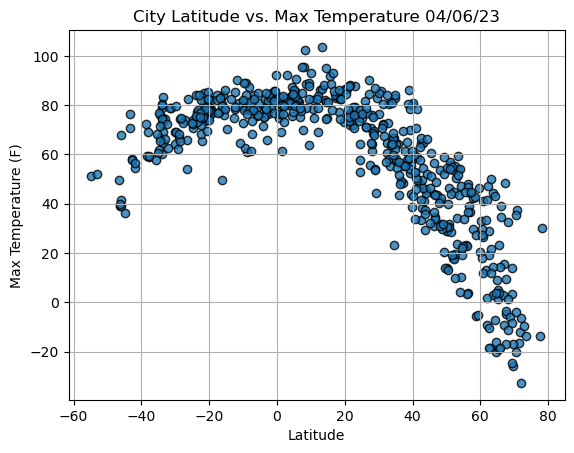

In [56]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

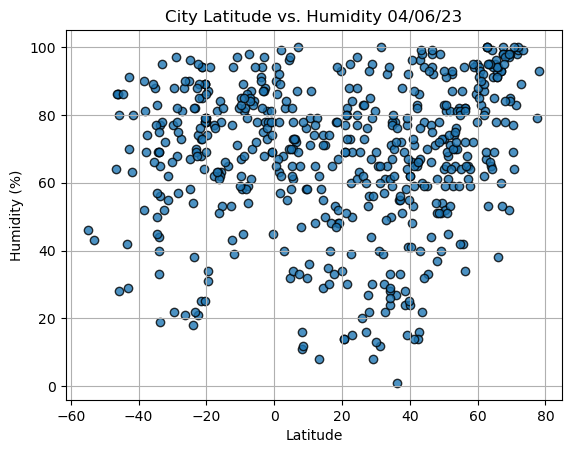

In [58]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

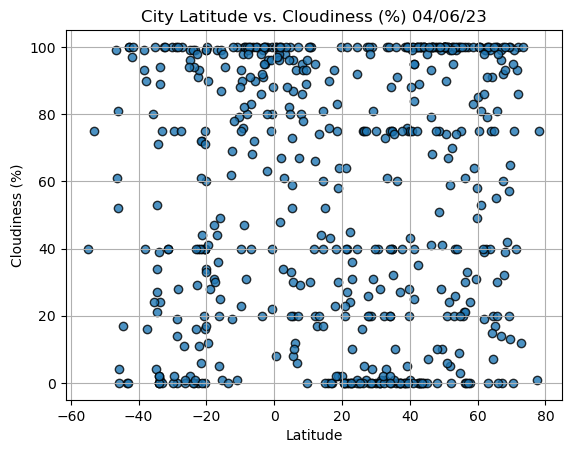

In [59]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

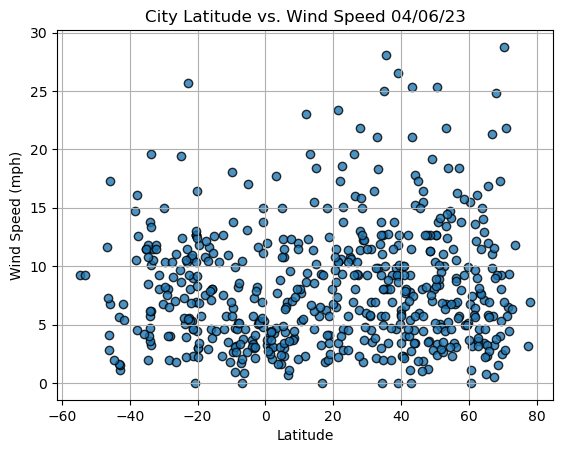

In [60]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()